## Import Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

## Fetch Data

In [6]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


## Explore Data

In [8]:
print('X-train shape :',x_train.shape)
print('Shape of single image:',x_train[0].shape)

X-train shape : (50000, 32, 32, 3)
Shape of single image: (32, 32, 3)


CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

Image of a FROG


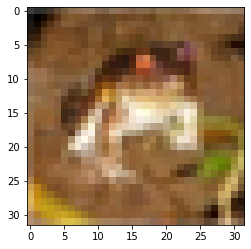

In [10]:

print('Image of a FROG')
plt.imshow(x_train[0])

Image of a CAR


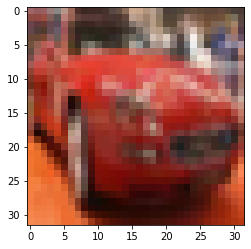

In [16]:

print('Image of a CAR')
plt.imshow(x_train[5])

 ## Data Preprocessing

In [20]:
print('Max pixel value of image : ',x_train.max())
x_train = x_train/225
x_test = x_test/255
print('X-train shape :',x_train.shape)
print('X-test shape :',x_test.shape)

Max pixel value of image :  255
X-train shape : (50000, 32, 32, 3)
X-test shape : (10000, 32, 32, 3)


## Label Data

In [22]:
print('y_train shape :',y_train.shape)


y_train shape : (50000, 1)


In [24]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Build Model

In [27]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [30]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 56s 35ms/step - loss: 1.5161 - accuracy: 0.4577 - val_loss: 1.2144 - val_accuracy: 0.5726
Epoch 2/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1585 - accuracy: 0.5947 - val_loss: 1.1289 - val_accuracy: 0.5988
Epoch 3/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0072 - accuracy: 0.6497 - val_loss: 1.0968 - val_accuracy: 0.6171
Epoch 4/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9037 - accuracy: 0.6883 - val_loss: 1.1755 - val_accuracy: 0.6122
Epoch 5/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8228 - accuracy: 0.7169 - val_loss: 1.0704 - val_accuracy: 0.6321
Epoch 6/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7616 - accuracy: 0.7402 - val_loss: 0.9924 - val_accuracy: 0.6636
Epoch 7/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7041 - accuracy: 0.7616 - val_loss: 1.0333 -

In [31]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.516134,0.45770,1.214387,0.5726
1,1.158498,0.59466,1.128939,0.5988
2,1.007237,0.64972,1.096847,0.6171
3,0.903703,0.68830,1.175485,0.6122
4,0.822813,0.71692,1.070371,0.6321


## Plot accuracy

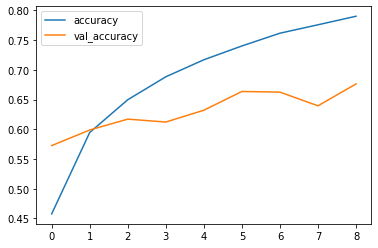

In [32]:
losses[['accuracy','val_accuracy']].plot()

## Plot lossess

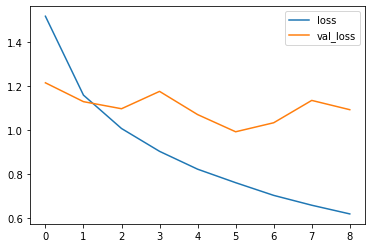

In [33]:
losses[['loss','val_loss']].plot()

In [45]:
predictions = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1000
           1       0.83      0.81      0.82      1000
           2       0.46      0.72      0.56      1000
           3       0.49      0.52      0.51      1000
           4       0.69      0.53      0.60      1000
           5       0.61      0.51      0.56      1000
           6       0.69      0.81      0.74      1000
           7       0.86      0.63      0.73      1000
           8       0.83      0.75      0.79      1000
           9       0.76      0.80      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



## Confusion Matrix

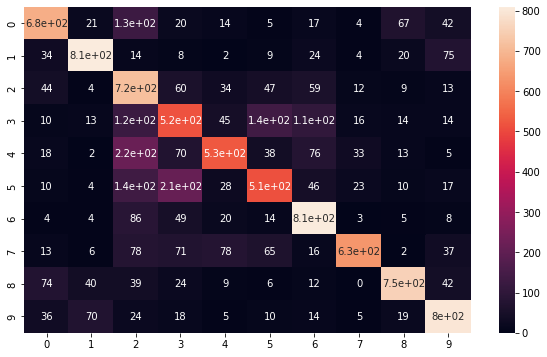

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

## Predictions/Evaluating model

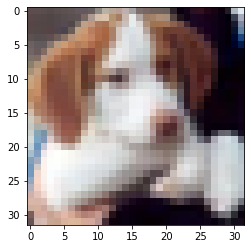

In [47]:
my_image = x_test[16]
plt.imshow(my_image)

In [50]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3)).argmax(axis=1)

array([5])

Prediction is accurate , 
5 is  a DOG

ref link : https://www.cs.toronto.edu/~kriz/cifar.html